# Slope Analysis

This project use the change of holding current slope to identify drug responders.

## Analysis Steps

The `getBaselineAndMaxDrugSlope` function smoothes the raw data by the moving window decided by `filterSize`, and analyzes the smoothed holding current in an ABF and returns baseline slope and drug slope.

The _slope of baseline_ is calculated as the linear regreasion slope during the 3 minutes period before drug onset.

In addition, the smoothed data are separated into segments which n = regressionSize data points are included. The linear regression slope is then calculated for each segment. 

The _peak slope of drug_ is the most negative slope during the chosen drug period (1-5 minutes after drug onset, in this case).

## Set-Up the Environment

In [1]:
%load_ext autoreload
import sys
sys.path.append("../src")
from os.path import basename
import slopeTools
import plotTools
import statsTools
import matplotlib.pyplot as plt

## Define ABF Files and Filter Settings

The user can list the ABF files they want to analyze

In [2]:
#opto: 
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21124006.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21124013.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21124020.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21124026.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21124033.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21126007.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21126016.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21126030.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21126050.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21126056.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21218033.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21219006.abf"
]

#opto+l368: 
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21218077.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21219013.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21219039.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21219069.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21323006.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21323036.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21323047.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21325007.abf",
    "X:/Data/C57/TGOT on PVT/2020-10-12 OT-ChR2/21325019.abf"
]

#10nM TGOT
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804007.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804030.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804043.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804048.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804060.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804066.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805008.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805029.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805035.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811011.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811021.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817012.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831011.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831017.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/2021_05_14_DIC1_0008.abf"
]


#10nM TGOT+L368
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805041.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805047.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805053.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20806018.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20806036.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811034.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811041.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817020.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817026.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817032.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817039.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20901022.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20901035.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20902011.abf",   
    
]

#50nM TGOT
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20723038.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20723029.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20724011.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20724017.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20724023.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20724027.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20724033.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/20724045.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/2021_05_13_DIC1_0005.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/2021_05_13_DIC1_0021.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/2021_05_13_DIC1_0025.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-23 50nM TGOT on PVT/2021_05_13_DIC3_0050.abf"
]

#50nM TGOT+L368
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20727010.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20727026.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20727032.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20727039.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20728005.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20728011.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/20728026.abf",
    "X:/Data/C57/TGOT on PVT/2020-07-27 50nM TGOT w L368/2021_05_13_DIC3_0043.abf"
]

#50nM TGOT
abfFilePaths = [
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20n19022.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20n19029.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20n19036.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20n19052.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d03006.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d03032.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d03055.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d04012.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d04023.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d04030.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d04038.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d04045.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d04052.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d16012.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d16020.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d16035.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d17022.abf",
    "X:/Data/C57/TGOT on PVT/2020-11-18 TGOT on PVT-NAc neurons/20d17028.abf"
]

The users can decide the parameters they want for data analysis. 

`filterSize` decides number of points (sweeps) for the moving window average. 

`regressionSize` decides the number of smoothed data points used to calculate linear regression slopes during the drug range.

In [3]:
filterSize = 10
regressionSize = 17

## Analyze All ABFs

Baseline slope: 0.1487391163752629 pA/min
Drug slope: -1.3098633569829607 pA/min


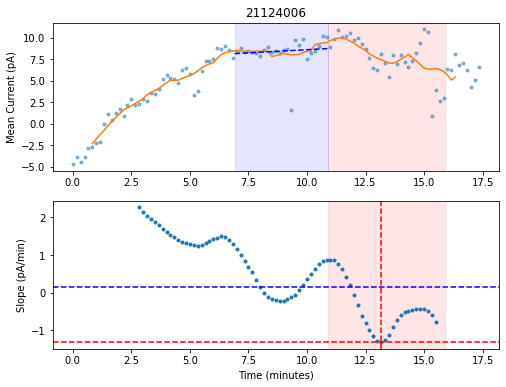

Baseline slope: -0.3506269278893103 pA/min
Drug slope: -1.005330338197596 pA/min


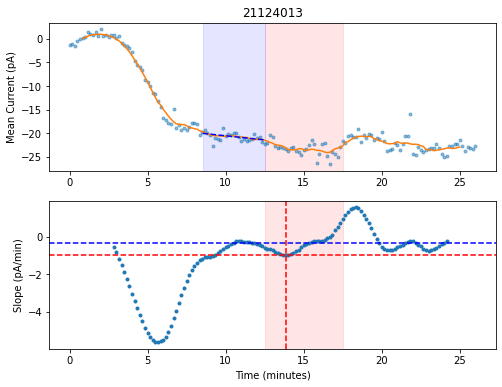

Baseline slope: 0.6694047986544098 pA/min
Drug slope: -2.5408997535705566 pA/min


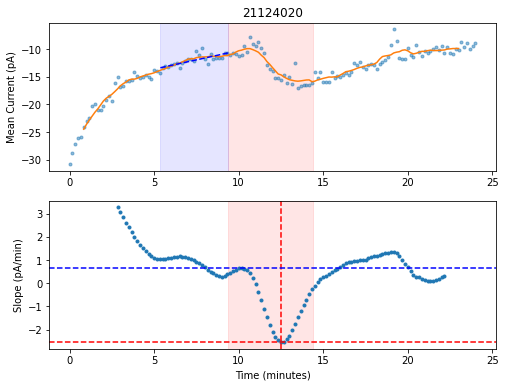

Baseline slope: -0.5402443533677322 pA/min
Drug slope: -2.1036826863008384 pA/min


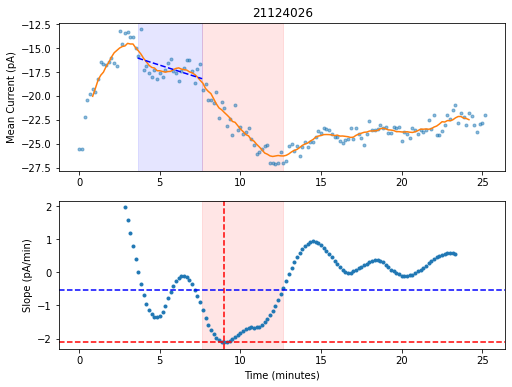

Baseline slope: -0.03364086077763485 pA/min
Drug slope: -1.8373742664561554 pA/min


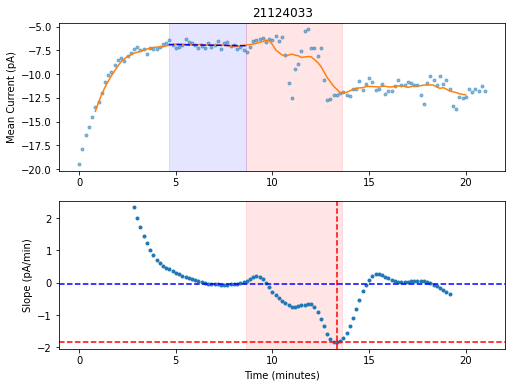

Baseline slope: 0.4608424153694741 pA/min
Drug slope: -3.192350834608078 pA/min


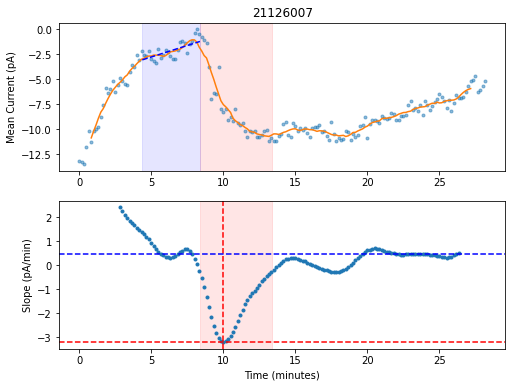

Baseline slope: 0.20658923919384287 pA/min
Drug slope: -0.37743958655525656 pA/min


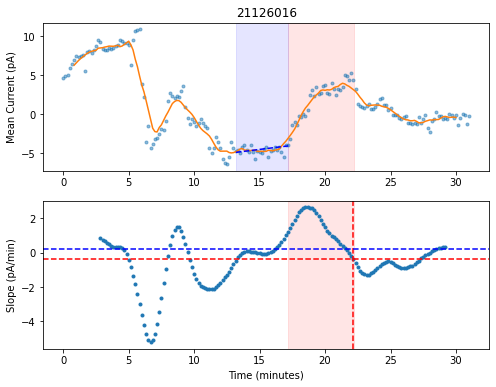

Baseline slope: 0.26565250836885895 pA/min
Drug slope: -1.3753636023577522 pA/min


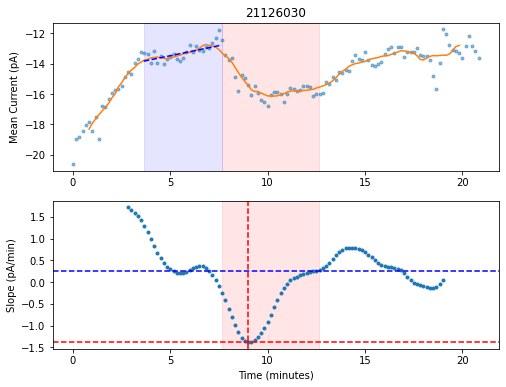

Baseline slope: 0.20821949298565204 pA/min
Drug slope: -0.8814657996682559 pA/min


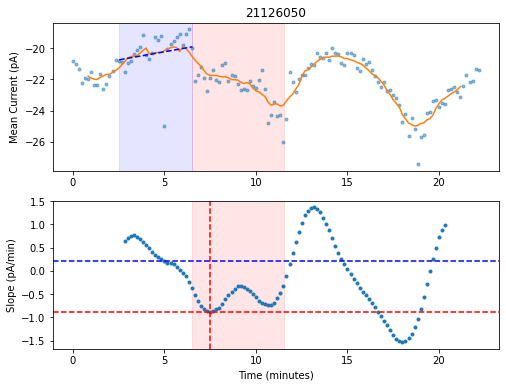

Baseline slope: -0.8711518874535191 pA/min
Drug slope: -1.1813653216642492 pA/min


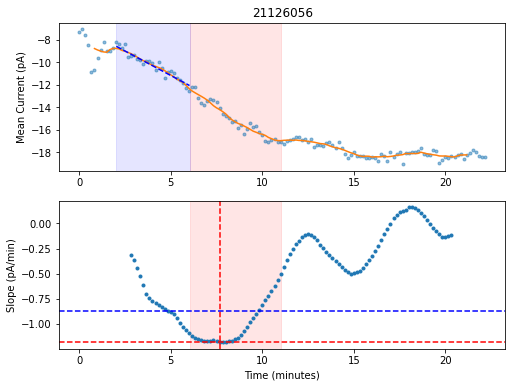

Baseline slope: -0.0010652600801907947 pA/min
Drug slope: -3.100793305565329 pA/min


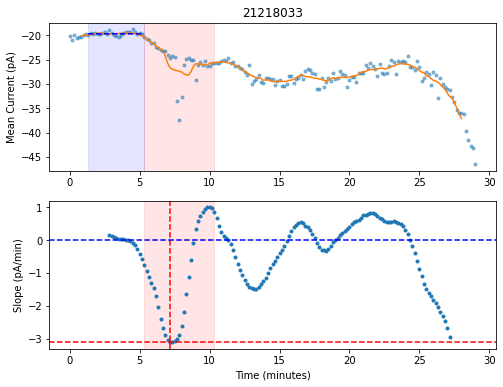

Baseline slope: 0.03195782881516676 pA/min
Drug slope: -1.7840013644274542 pA/min


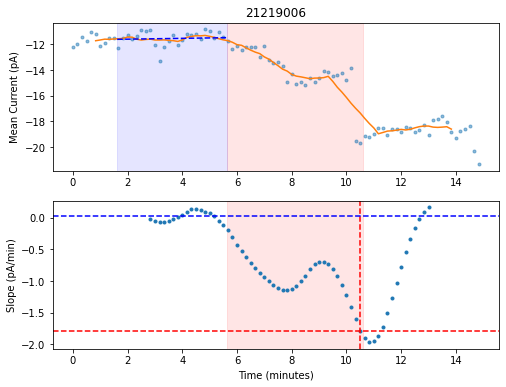

In [4]:
baselineSlopes = []
drugSlopes = []
abfIDs = []
for abfFilePath in abfFilePaths:
    baselineSlope, drugSlope = slopeTools.getBaselineAndMaxDrugSlope(abfFilePath, filterSize, regressionSize)
    baselineSlopes.append(baselineSlope)
    drugSlopes.append(drugSlope)
    abfIDs.append(basename(abfFilePath))

## Compare Baseline vs. Drug Slopes

The users can plot the basleine slope and the peak drug slope of each cell, and report the p-value in the title by performing a paired t-test between baseline slopes and peak drug slopes.

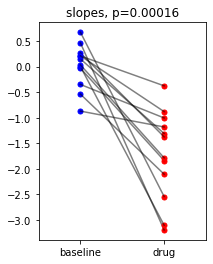

In [5]:
plotTools.plotPairs(baselineSlopes, drugSlopes, "slopes")


## Assess Responsiveness of All Cells

Generate a scatter plot showing the slope difference of each cell.

<ipython-input-6-05cac887f3a1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(abfIDs, rotation=45, ha='right')


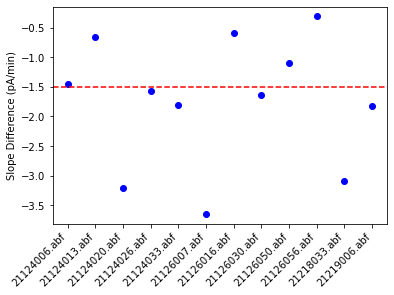

In [6]:
slopeThreshold = -1.5 
drugEffects = []
for i in range(len(abfIDs)):
    drugEffects.append(drugSlopes[i] - baselineSlopes[i])

plt.figure (figsize=(6, 4))
plt.ylabel("Slope Difference (pA/min)")
plt.plot(abfIDs, drugEffects, 'o', color = "b")
plt.gca().set_xticklabels(abfIDs, rotation=45, ha='right')
plt.axhline(slopeThreshold, color='r', ls='--')
plt.show()

## Define Cells as Responsive vs. Non-Responsive

The users can define the <b>slopeThreshold</b>. The difference between baseline slope and peak drug slope must be more negative than this value to be a responder
slopeThreshold

In [7]:
drugEffects=statsTools.responderLessThanThreshold(abfIDs, drugEffects, slopeThreshold)

,0
Responder n,7
Non-responder n,5


,ABF#,Drug Effect,Response
0,21124006.abf,-1.458602,non-responder
1,21124013.abf,-0.654703,non-responder
2,21124020.abf,-3.210305,responder
3,21124026.abf,-1.563438,responder
4,21124033.abf,-1.803733,responder
5,21126007.abf,-3.653193,responder
6,21126016.abf,-0.584029,non-responder
7,21126030.abf,-1.641016,responder
8,21126050.abf,-1.089685,non-responder
9,21126056.abf,-0.310213,non-responder
